<center> <h1> <b> Zahamma Heart Model</b><br></h1></center>

<center>
    <img src="human_ai_fusion.jpg" alt="Zahamma Heart Model  " width="50%">
</center>


In [162]:
#import the following libraries.Make sure to install them first.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [163]:
#read the dataset
data = pd.read_csv('heart.csv')
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR   
0   40   M           ATA        140          289          0     Normal    172  \
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N     0.00       Up             0  
1              N     1.00     Flat             1  
2              N     0.00       Up             0  
3              Y     1.50     Flat             1  
4              N     0.00       Up             0

In [164]:
data.shape

(918, 12)

In [165]:
data.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


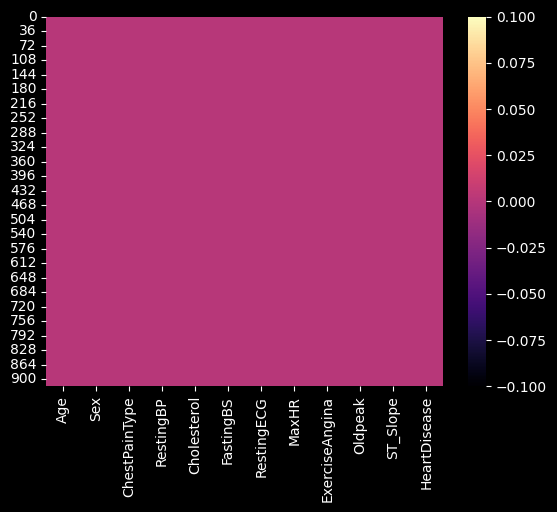

In [167]:
#visualise null data
sns.heatmap(data.isnull(),cmap = 'magma',cbar = True);

In [168]:
data.describe().T

count   mean    std   min    25%    50%    75%    max
Age          918.00  53.51   9.43 28.00  47.00  54.00  60.00  77.00
RestingBP    918.00 132.40  18.51  0.00 120.00 130.00 140.00 200.00
Cholesterol  918.00 198.80 109.38  0.00 173.25 223.00 267.00 603.00
FastingBS    918.00   0.23   0.42  0.00   0.00   0.00   0.00   1.00
MaxHR        918.00 136.81  25.46 60.00 120.00 138.00 156.00 202.00
Oldpeak      918.00   0.89   1.07 -2.60   0.00   0.60   1.50   6.20
HeartDisease 918.00   0.55   0.50  0.00   0.00   1.00   1.00   1.00

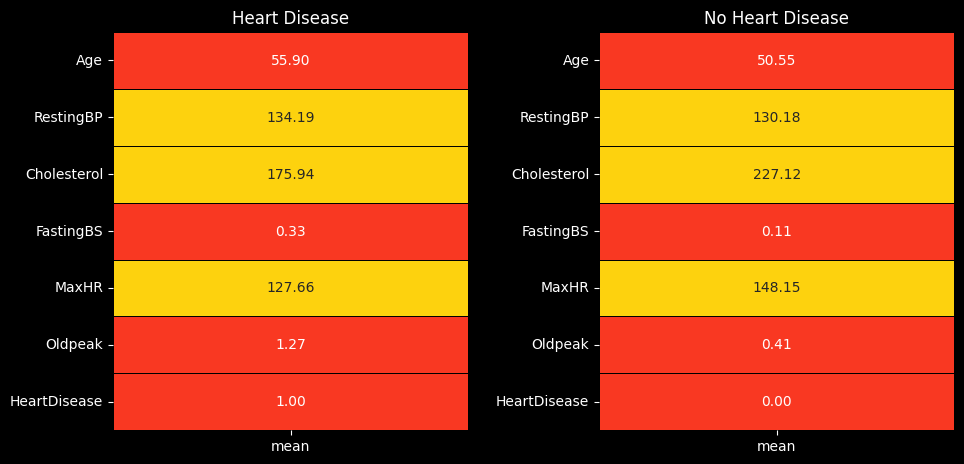

In [169]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for instances with Heart Disease and calculate descriptive statistics
yes = data[data['HeartDisease'] == 1].describe().T

# Filter data for instances without Heart Disease and calculate descriptive statistics
no = data[data['HeartDisease'] == 0].describe().T

# Define colors for heatmap
colors = ['#F93822', '#FDD20E']

# Create a figure and subplots for side-by-side heatmaps
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

# Subplot 1: Heatmap for descriptive statistics of instances with Heart Disease
plt.subplot(1, 2, 1)
sns.heatmap(yes[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Heart Disease')

# Subplot 2: Heatmap for descriptive statistics of instances without Heart Disease
plt.subplot(1, 2, 2)
sns.heatmap(no[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('No Heart Disease')

# Adjust layout to improve spacing
fig.tight_layout(pad=2)

# Display the resulting plot
plt.show()


In [170]:
# Get the list of all columns in the data
col = list(data.columns)

# Initialize lists to store categorical and numerical features
categorical_features = []
numerical_features = []

# Iterate through each column to determine whether it's categorical or numerical
for i in col:
    # Check the number of unique values in the column to decide its type
    if len(data[i].unique()) > 6:
        numerical_features.append(i)  # If unique values > 6, consider it as numerical
    else:
        categorical_features.append(i)  # Otherwise, consider it as categorical

# Print the list of categorical features
print('Categorical Features:', *categorical_features)

# Print the list of numerical features
print('Numerical Features:', *numerical_features)


Categorical Features: Sex ChestPainType FastingBS RestingECG ExerciseAngina ST_Slope HeartDisease
Numerical Features: Age RestingBP Cholesterol MaxHR Oldpeak


### Categorical Features :

In [171]:
# Import LabelEncoder from sklearn's preprocessing module
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
le = LabelEncoder()

# Make a deep copy of the original data
df1 = data.copy(deep=True)

# Use LabelEncoder to transform categorical columns to numeric values
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['ChestPainType'] = le.fit_transform(df1['ChestPainType'])
df1['RestingECG'] = le.fit_transform(df1['RestingECG'])
df1['ExerciseAngina'] = le.fit_transform(df1['ExerciseAngina'])
df1['ST_Slope'] = le.fit_transform(df1['ST_Slope'])


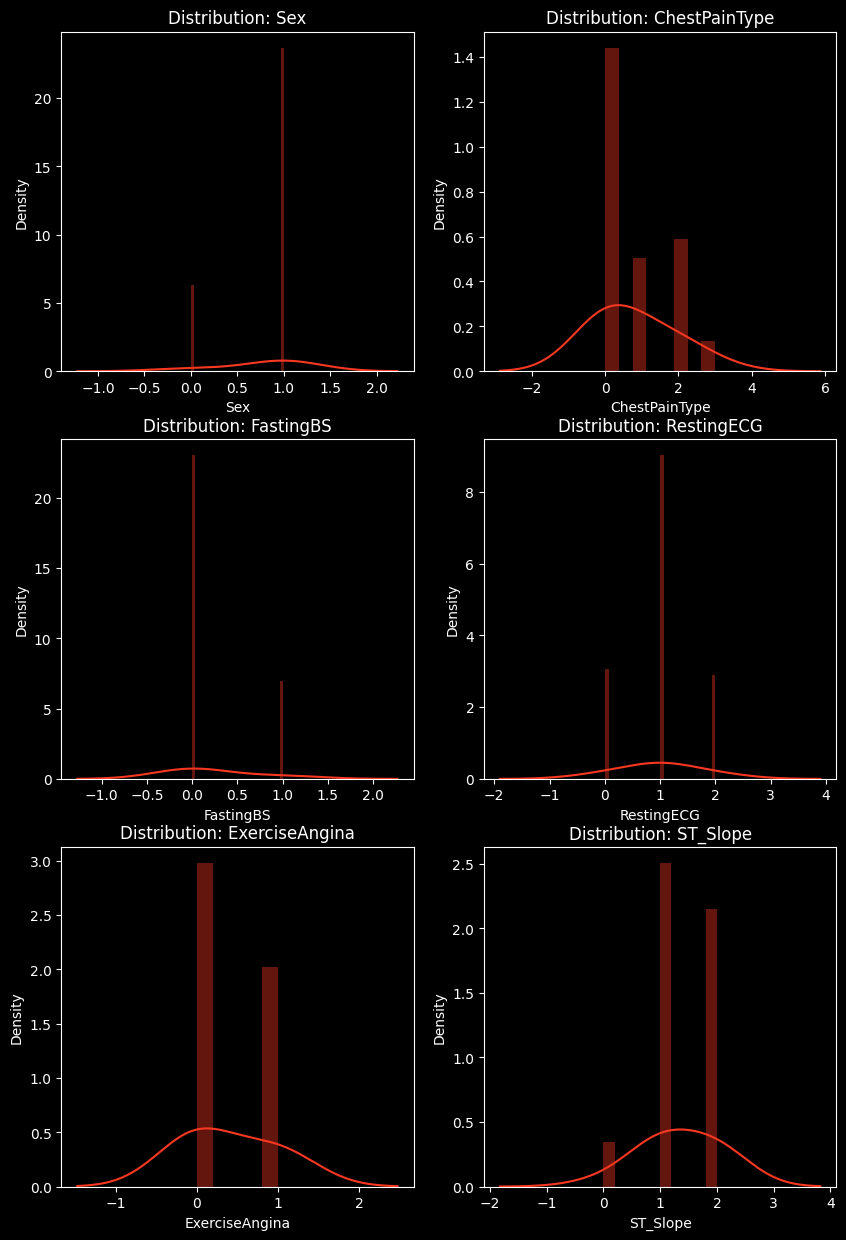

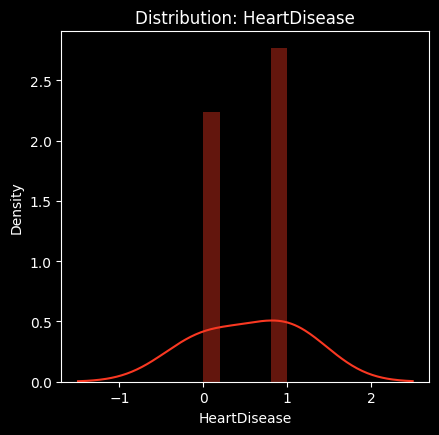

In [172]:
# Create a 3x2 grid of subplots for visualizing categorical data distributions
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

# Loop through the categorical features to visualize their distributions
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i + 1)
    # Plot a distribution plot (histogram) with kernel density estimate for the current categorical feature
    sns.distplot(df1[categorical_features[i]], kde_kws={'bw': 1}, color=colors[0])
    title = 'Distribution: ' + categorical_features[i]
    plt.title(title)

# Plot the distribution of the last categorical feature separately
plt.figure(figsize=(4.75, 4.55))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]], kde_kws={'bw': 1}, color=colors[0])
title = 'Distribution: ' + categorical_features[len(categorical_features) - 1]
plt.title(title)

# Display the plots
plt.show()


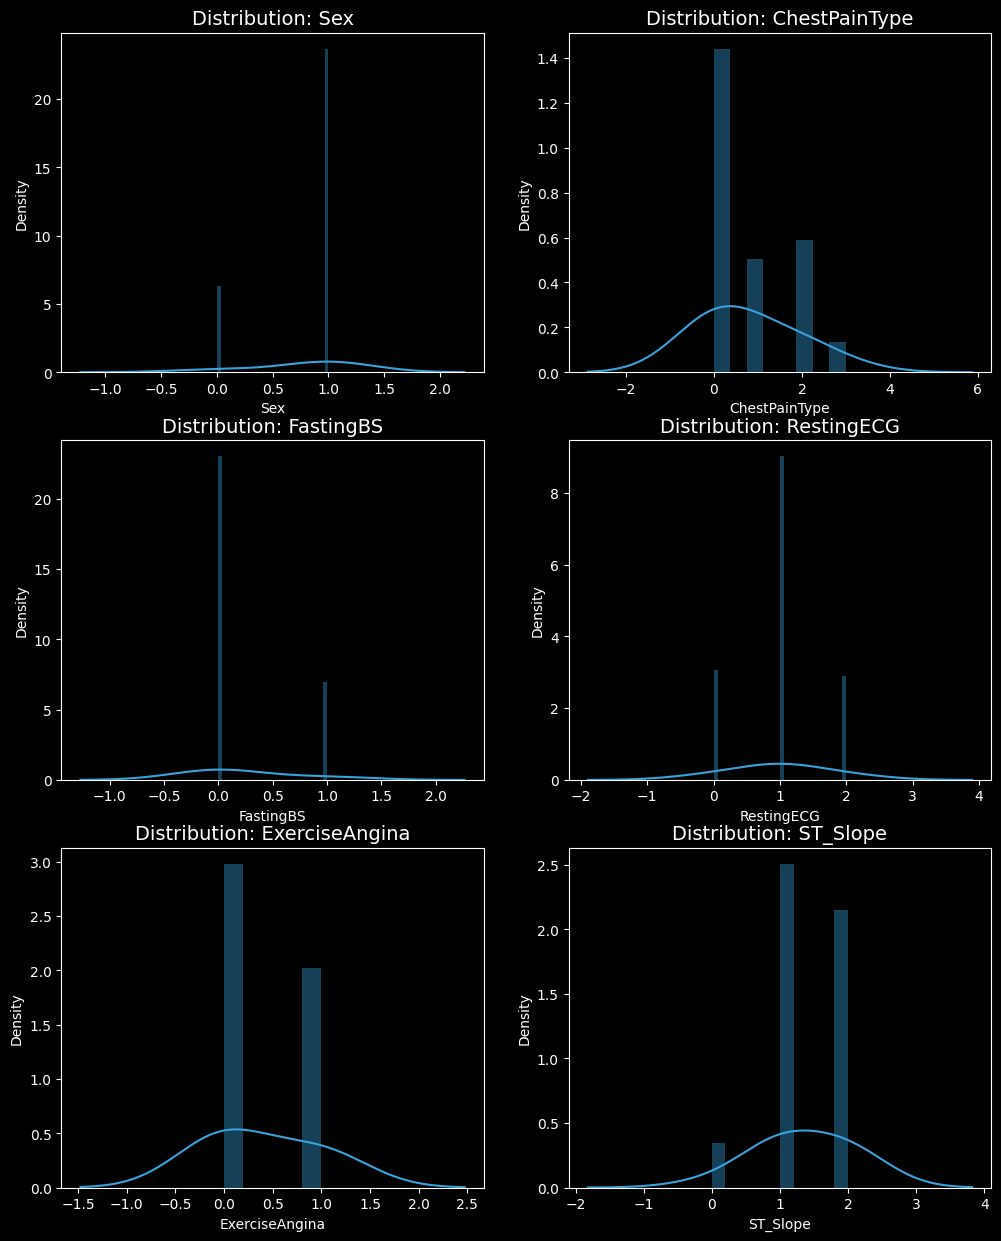

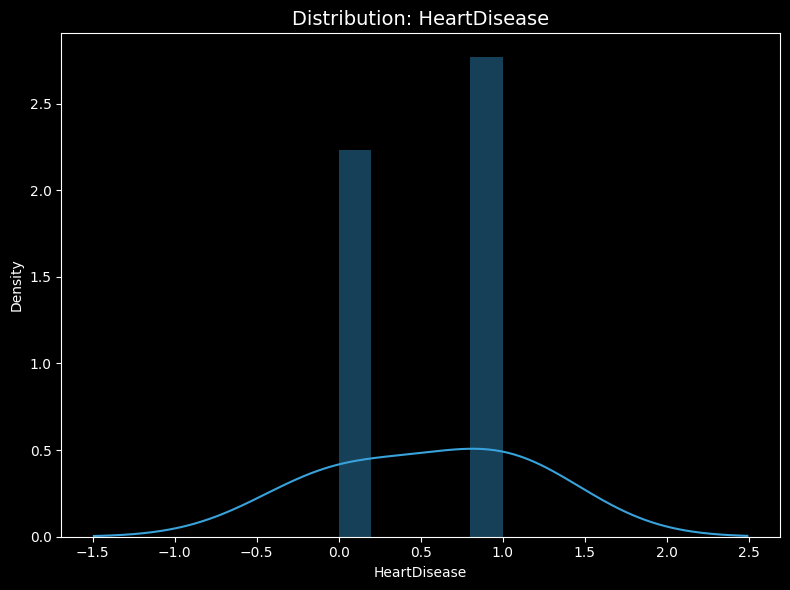

In [173]:
# Define a modern color palette
colors = ['#39A2DB', '#FF6D00']

# Create subplots with modern styling
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))
plt.style.use('dark_background')  # Use a dark background style

# Loop through the categorical features to visualize their distributions
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i + 1)
    sns.distplot(df1[categorical_features[i]], kde_kws={'bw': 1}, color=colors[0])
    title = 'Distribution: ' + categorical_features[i]
    plt.title(title, fontsize=14, color='white')  # Set title with white text
    plt.xlabel(categorical_features[i], color='white')  # Feature label
    plt.ylabel('Density', color='white')  # Label for y-axis
    plt.tick_params(axis='both', colors='white')  # White tick marks

# Create a separate figure for the last distribution plot
plt.figure(figsize=(8, 6))
sns.distplot(df1[categorical_features[len(categorical_features) - 1]], kde_kws={'bw': 1}, color=colors[0])
title = 'Distribution: ' + categorical_features[len(categorical_features) - 1]
plt.title(title, fontsize=14, color='white')  # Set title with white text
plt.xlabel(categorical_features[len(categorical_features) - 1], color='white')  # Feature label
plt.ylabel('Density', color='white')  # Label for y-axis
plt.tick_params(axis='both', colors='white')  # White tick marks

# Adjust layout for better spacing
plt.tight_layout()

# Display the plots
plt.show()


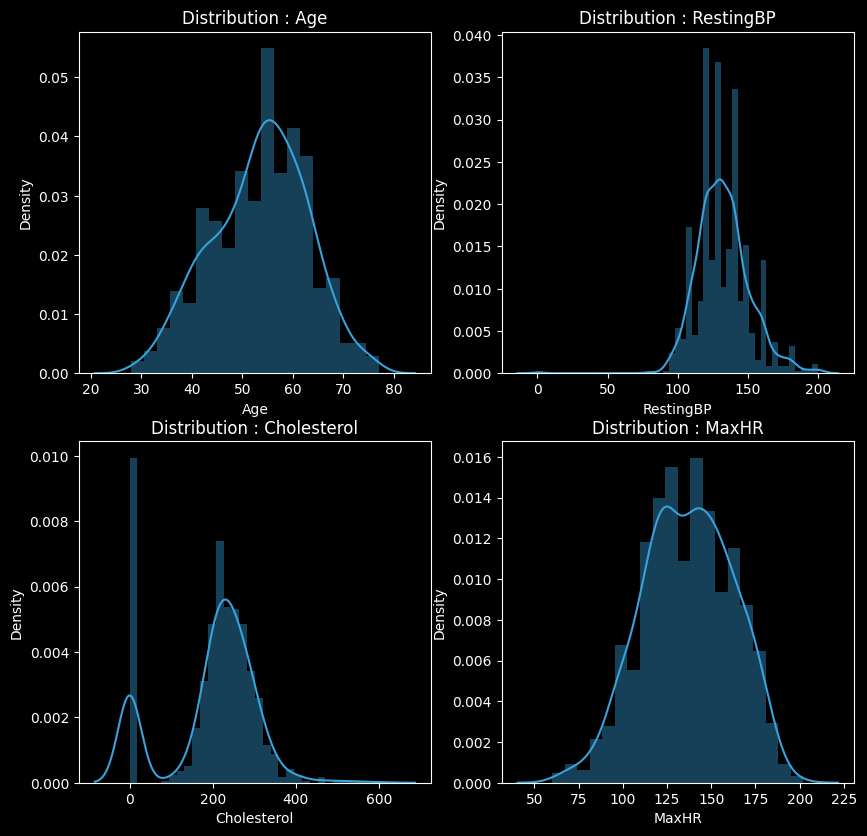

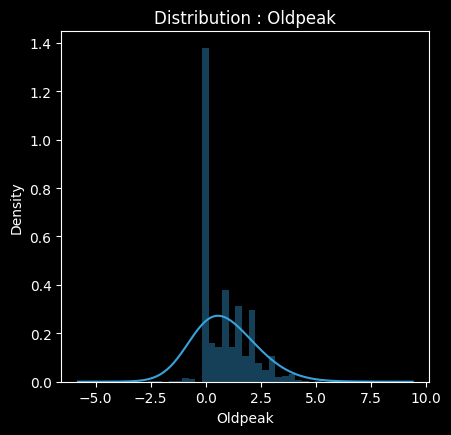

In [174]:
#lets now visualise the numerical data
fig, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (10,9.75))
for i in range(len(numerical_features) - 1):
    plt.subplot(2,2,i+1)
    sns.distplot(data[numerical_features[i]],color = colors[0])
    title = 'Distribution : ' + numerical_features[i]
    plt.title(title)
plt.show()

plt.figure(figsize = (4.75,4.55))
sns.distplot(df1[numerical_features[len(numerical_features) - 1]],kde_kws = {'bw' : 1},color = colors[0])
title = 'Distribution : ' + numerical_features[len(numerical_features) - 1]
plt.title(title);

### Target Variable Visualization (HeartDisease) : 

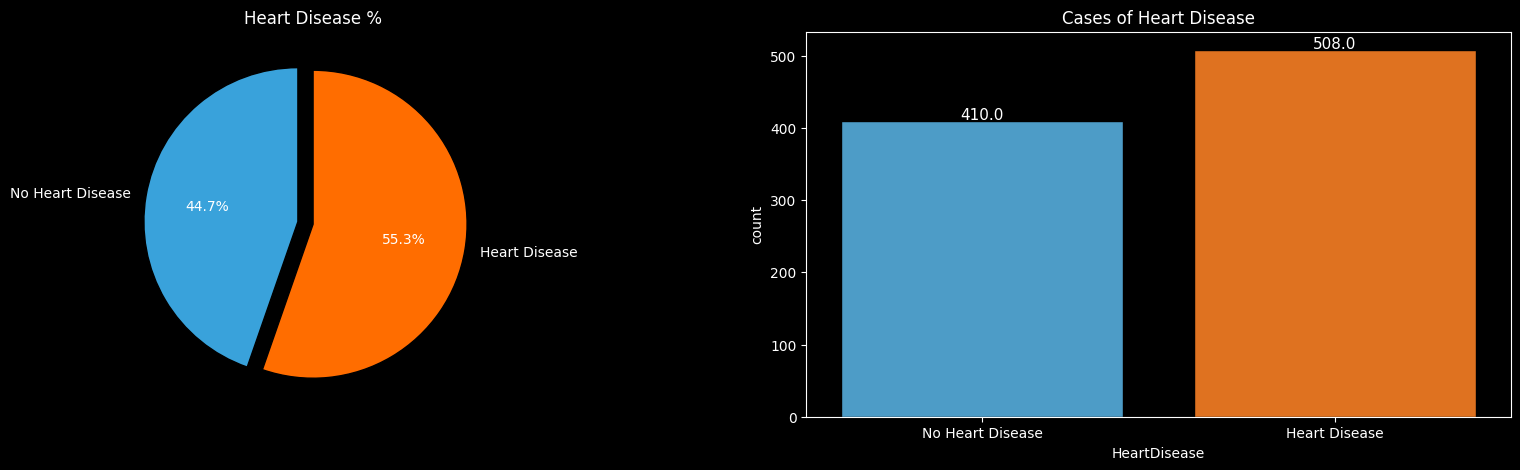

In [175]:
# Calculate the percentage of each class in the 'HeartDisease' column
l = list(data['HeartDisease'].value_counts())
circle = [l[1] / sum(l) * 100, l[0] / sum(l) * 100]

# Create a figure with two subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

# Subplot 1: Pie chart showing the percentage of Heart Disease cases
plt.subplot(1, 2, 1)
plt.pie(circle, labels=['No Heart Disease', 'Heart Disease'], autopct='%1.1f%%', startangle=90,
        explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Heart Disease %')

# Subplot 2: Countplot showing the cases of Heart Disease
plt.subplot(1, 2, 2)
ax = sns.countplot(x='HeartDisease', data=data, palette=colors, edgecolor='black')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
ax.set_xticklabels(['No Heart Disease', 'Heart Disease'])
plt.title('Cases of Heart Disease')

# Display the plots
plt.show()


### Categorical Features vs Target Variable (HeartDisease) :

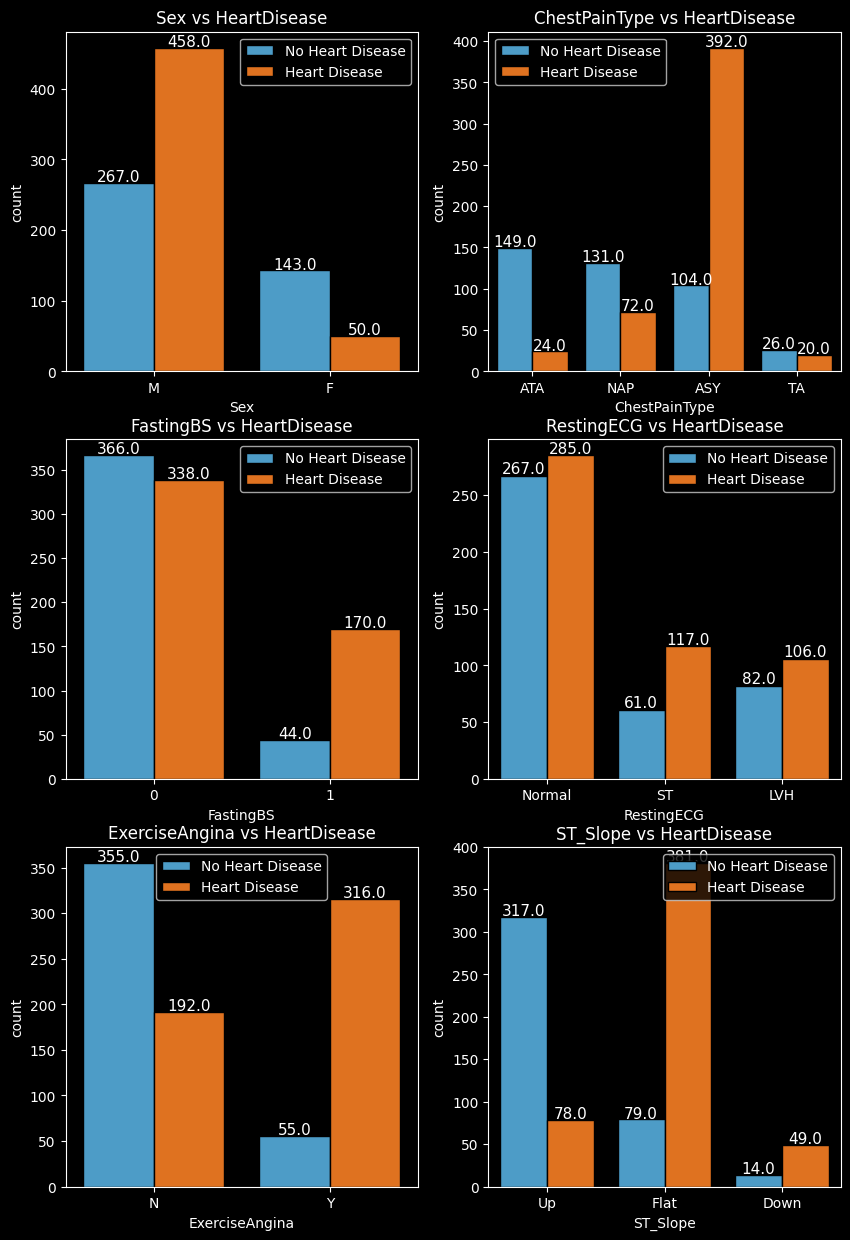

In [176]:
# Create subplots for comparing categorical features against Heart Disease
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 15))

# Loop through the categorical features to create countplots
for i in range(len(categorical_features) - 1):
    plt.subplot(3, 2, i + 1)
    
    # Create a countplot with each categorical feature and hue as 'HeartDisease'
    ax = sns.countplot(x=categorical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black')
    
    # Add text annotations to the bars
    for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize=11)
    
    # Set the title and legend for the current subplot
    title = categorical_features[i] + ' vs HeartDisease'
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.title(title)

# Display the plots
plt.show()


### Categorical Features vs Positive Heart Disease Cases :

In [177]:
# Calculate the percentage distribution of categorical variables for instances with Heart Disease

# Sex distribution
sex = data[data['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

# Chest Pain Type distribution
cp = data[data['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100, cp[1] / sum(cp) * 100, cp[2] / sum(cp) * 100, cp[3] / sum(cp) * 100]

# Fasting Blood Sugar distribution
fbs = data[data['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100, fbs[1] / sum(fbs) * 100]

# Resting ECG distribution
restecg = data[data['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100, restecg[1] / sum(restecg) * 100, restecg[2] / sum(restecg) * 100]

# Exercise Induced Angina distribution
exang = data[data['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100, exang[1] / sum(exang) * 100]

# ST Segment Slope distribution
slope = data[data['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100, slope[1] / sum(slope) * 100, slope[2] / sum(slope) * 100]


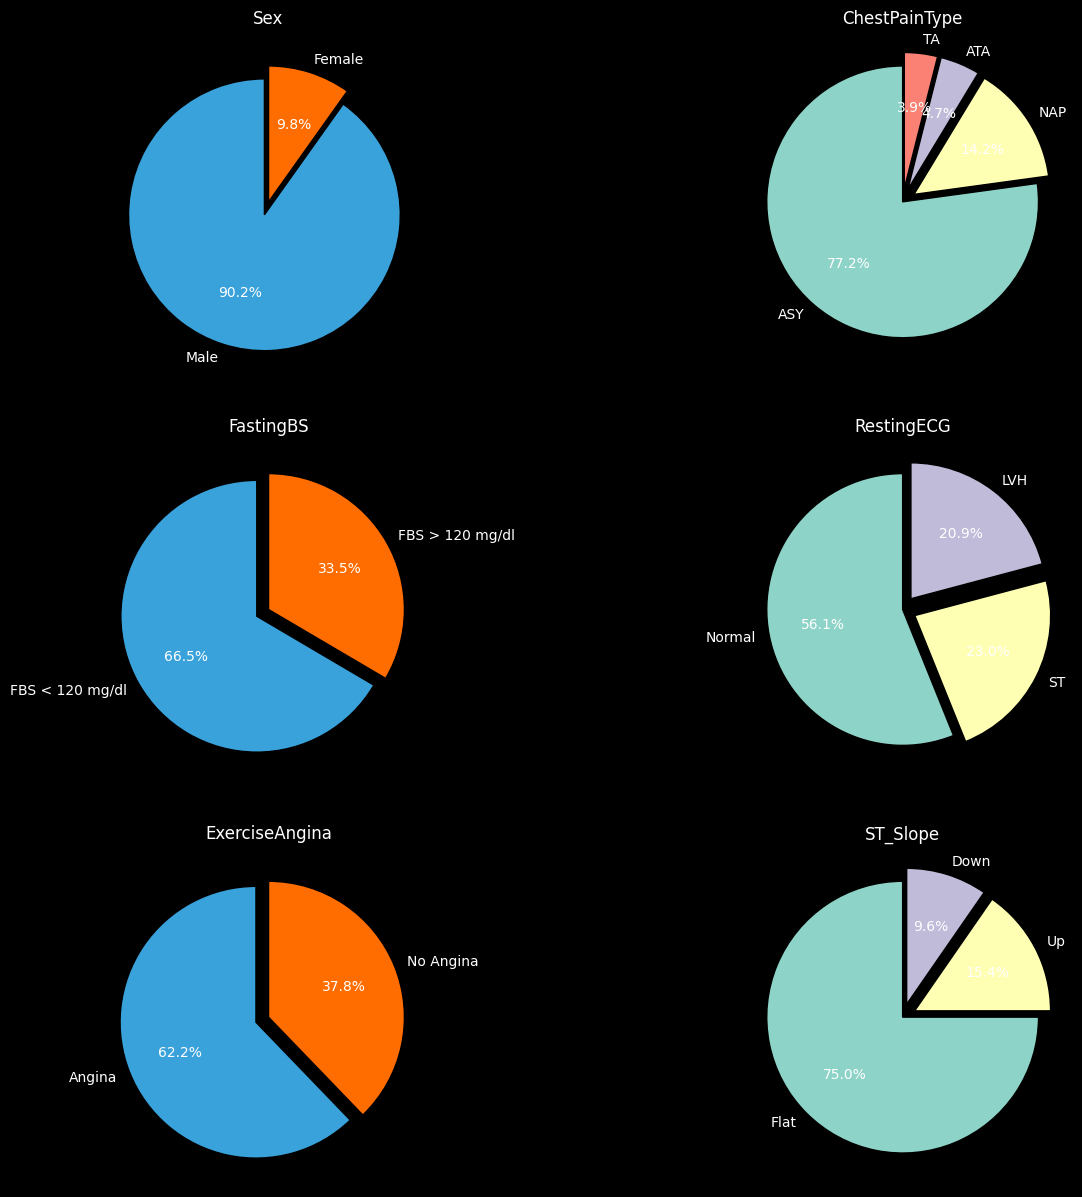

In [178]:
# Create subplots for pie charts to visualize categorical variable distributions
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))

# Subplot 1: Sex distribution
plt.subplot(3, 2, 1)
plt.pie(sex, labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('Sex')

# Subplot 2: Chest Pain Type distribution
plt.subplot(3, 2, 2)
plt.pie(cp, labels=['ASY', 'NAP', 'ATA', 'TA'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ChestPainType')

# Subplot 3: Fasting Blood Sugar distribution
plt.subplot(3, 2, 3)
plt.pie(fbs, labels=['FBS < 120 mg/dl', 'FBS > 120 mg/dl'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('FastingBS')

# Subplot 4: Resting ECG distribution
plt.subplot(3, 2, 4)
plt.pie(restecg, labels=['Normal', 'ST', 'LVH'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('RestingECG')

# Subplot 5: Exercise Induced Angina distribution
plt.subplot(3, 2, 5)
plt.pie(exang, labels=['Angina', 'No Angina'], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), colors=colors,
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ExerciseAngina')

# Subplot 6: ST Segment Slope distribution
plt.subplot(3, 2, 6)
plt.pie(slope, labels=['Flat', 'Up', 'Down'], autopct='%1.1f%%', startangle=90, explode=(0, 0.1, 0.1),
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'antialiased': True})
plt.title('ST_Slope')

# Display the plots
plt.show()


### Numerical Features vs Target Variable (HeartDisease) :

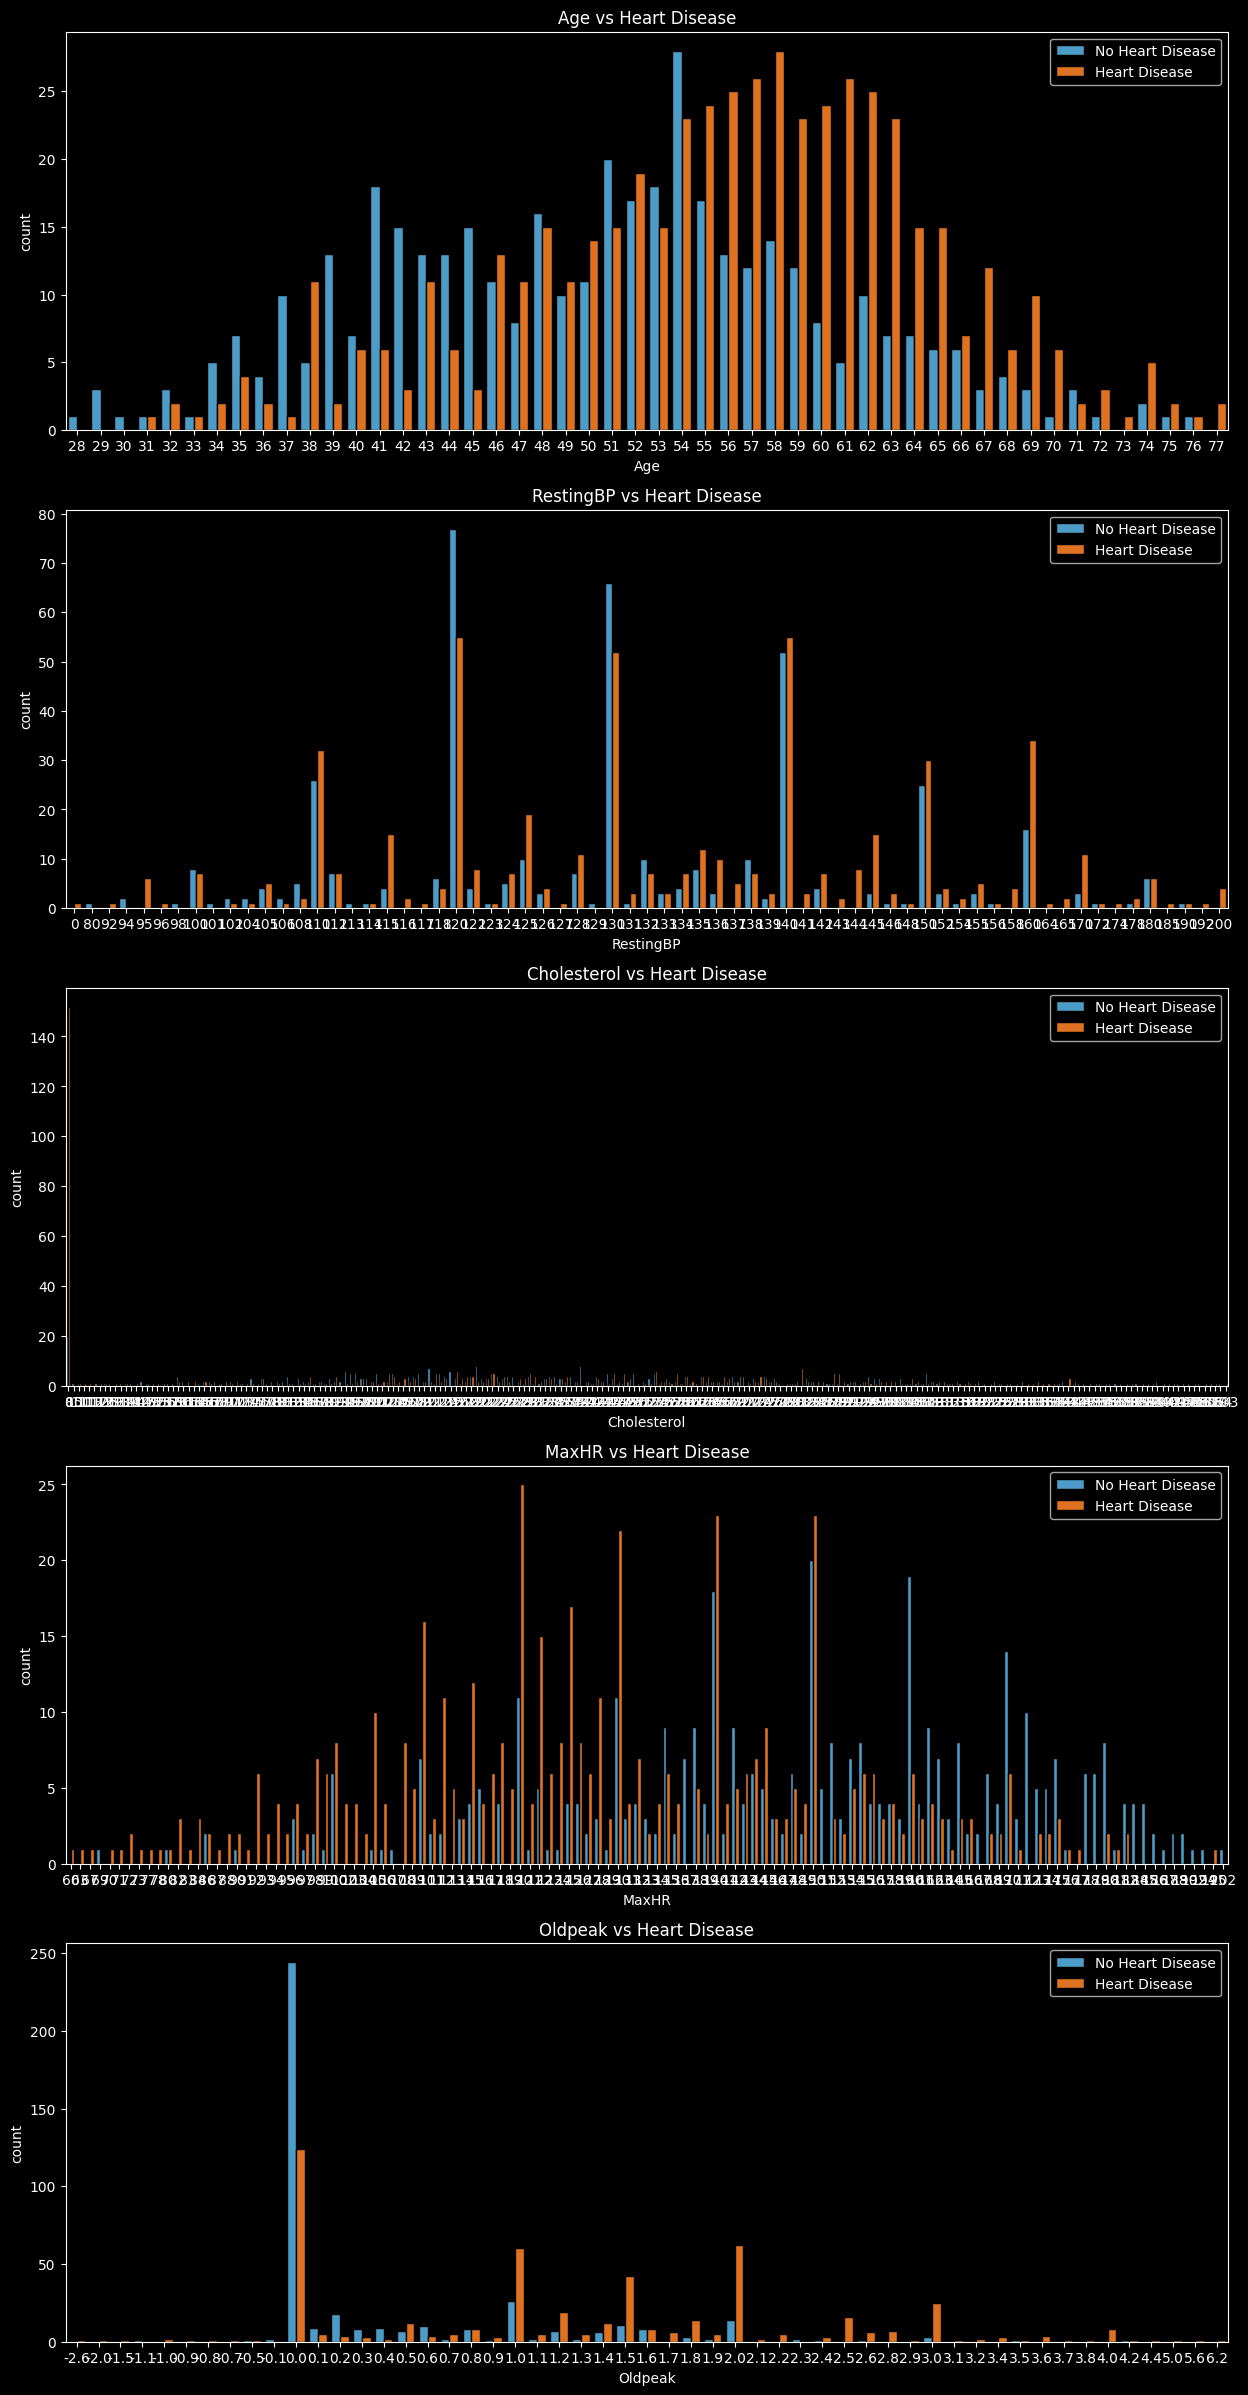

In [181]:
# Create subplots for comparing numerical features against Heart Disease
fig, ax = plt.subplots(nrows=5, ncols=1, figsize=(15, 30))

# Loop through the numerical features to create countplots
for i in range(len(numerical_features)):
    plt.subplot(5, 1, i + 1)
    
    # Create a countplot with each numerical feature and hue as 'HeartDisease'
    sns.countplot(x=numerical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black')
    
    # Set the title and legend for the current subplot
    title = numerical_features[i] + ' vs Heart Disease'
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.title(title)

# Display the plots
plt.show()


- Because of too many unique data points in the above features, it is difficult to gain any type of insight. Thus, we will convert these numerical features,except age, into categorical features for understandable visualization and gaining insights purposes. 
- Thus, we scale the individual values of these features. This brings the varied data points to a constant value that represents a range of values.
- Here, we divide the data points of the numerical features by 5 or 10 and assign its quotient value as the representative constant for that data point. The scaling constants of 5 & 10 are decided by looking into the data & intuition. 

In [182]:
# Create a new column 'RestingBP_Group' by grouping 'RestingBP' values
data['RestingBP_Group'] = [int(i / 5) for i in data['RestingBP']]

# Create a new column 'Cholesterol_Group' by grouping 'Cholesterol' values
data['Cholesterol_Group'] = [int(i / 10) for i in data['Cholesterol']]

# Create a new column 'MaxHR_Group' by grouping 'MaxHR' values
data['MaxHR_Group'] = [int(i / 5) for i in data['MaxHR']]

# Create a new column 'Oldpeak_Group' by grouping 'Oldpeak' values
data['Oldpeak_Group'] = [int((i * 10) / 5) for i in data['Oldpeak']]


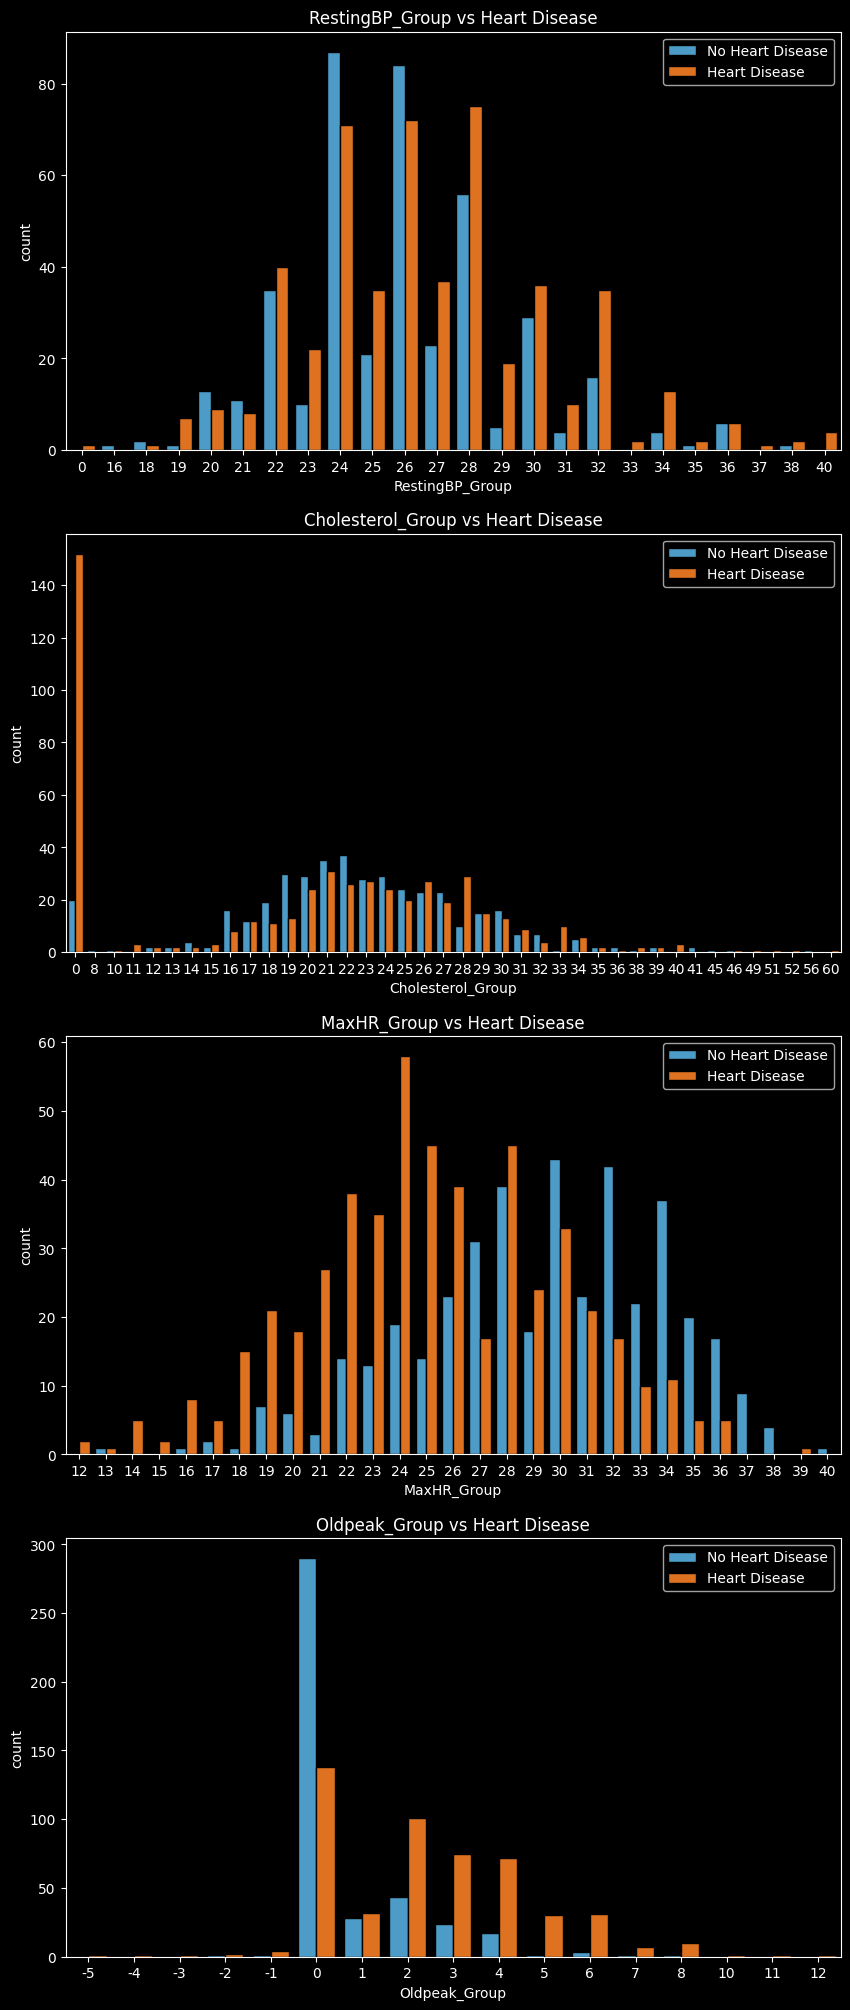

In [183]:
# Create subplots for comparing grouped numerical features against Heart Disease
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(10, 25))

# Generate a list of column names for grouped numerical features
group_numerical_features = [i + '_Group' for i in numerical_features[1:]]

# Loop through the grouped numerical features to create countplots
for i in range(len(group_numerical_features)):
    plt.subplot(4, 1, i + 1)
    
    # Create a countplot with each grouped numerical feature and hue as 'HeartDisease'
    sns.countplot(x=group_numerical_features[i], data=data, hue="HeartDisease", palette=colors, edgecolor='black')
    
    # Set the title and legend for the current subplot
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = group_numerical_features[i] + ' vs Heart Disease'
    plt.title(title)

# Display the plots
plt.show()


- From the **RestingBP** group data, **95** (19x5) - **170** (34x5) readings are most prone to be detected with heart diseases.
- **Cholesterol** levels between **160** (16x10) - **340** (34x10) are highly susceptible to heart diseases.
- For the **MaxHR** readings, heart diseases are found throughout the data but **70** (14x5) - **180** (36x5) values has detected many cases. 
- **Oldpeak** values also display heart diseases throughout. **0** (0x5/10) - **4** (8x5/10) slope values display high probability to be diagnosed with heart diseases.

### Numerical features vs Categorical features w.r.t Target variable(HeartDisease) :

#### Sex vs Numerical Features :

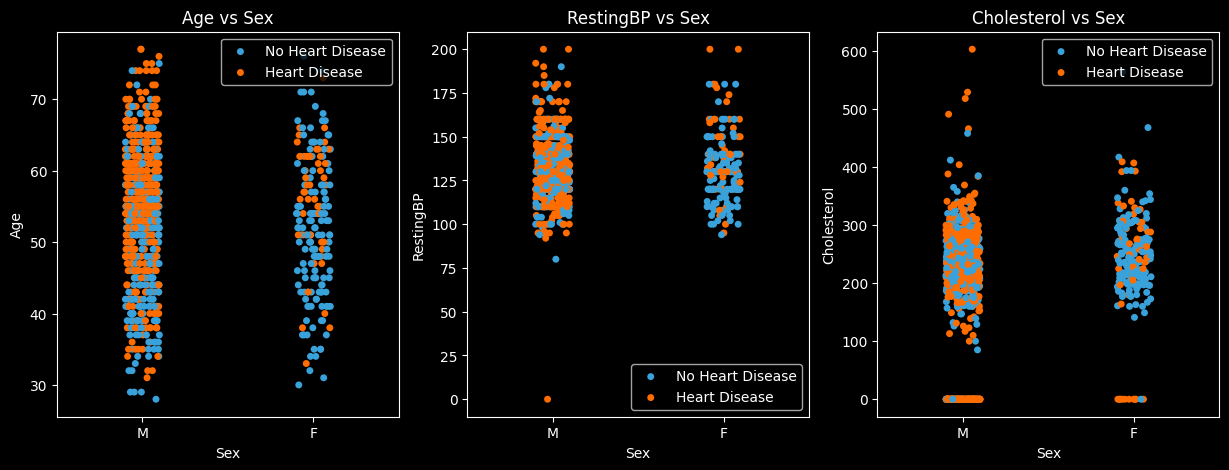

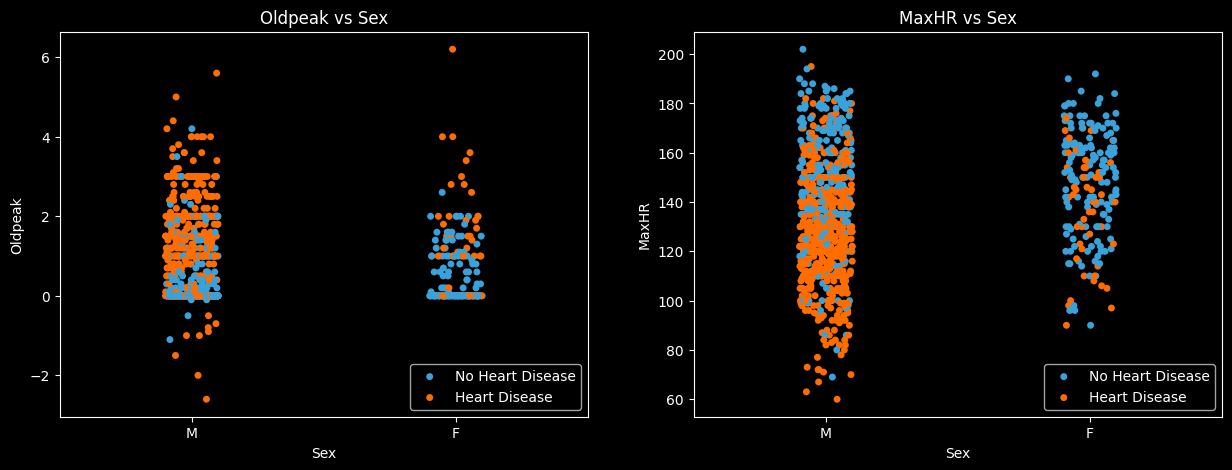

In [184]:
# Create subplots for strip plots comparing numerical features against Sex and Heart Disease
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through the first 3 numerical features to create strip plots
for i in range(3):
    plt.subplot(1, 3, i + 1)
    
    # Create a strip plot with 'Sex' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='Sex', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title)

# Create subplots for the last 2 numerical features
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loop through the last 2 numerical features using negative indices
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    
    # Create a strip plot with 'Sex' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='Sex', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Sex' 
    plt.title(title)


- **Male** population displays heart diseases at near about all the values of the numerical features. Above the age of 50, positive old peak values and maximum heart rate below 140, heart diseases in male population become dense.
- **Female** population data points are very less as compared to **male** population data points. Hence, we cannot point to specific ranges or values that display cases of heart diseases. 

#### ChestPainType vs Numerical Features :

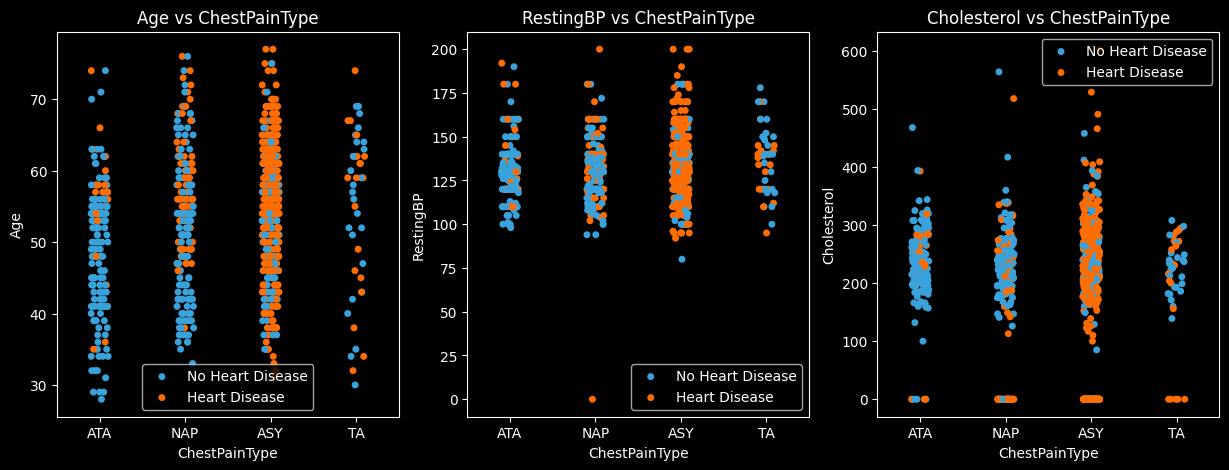

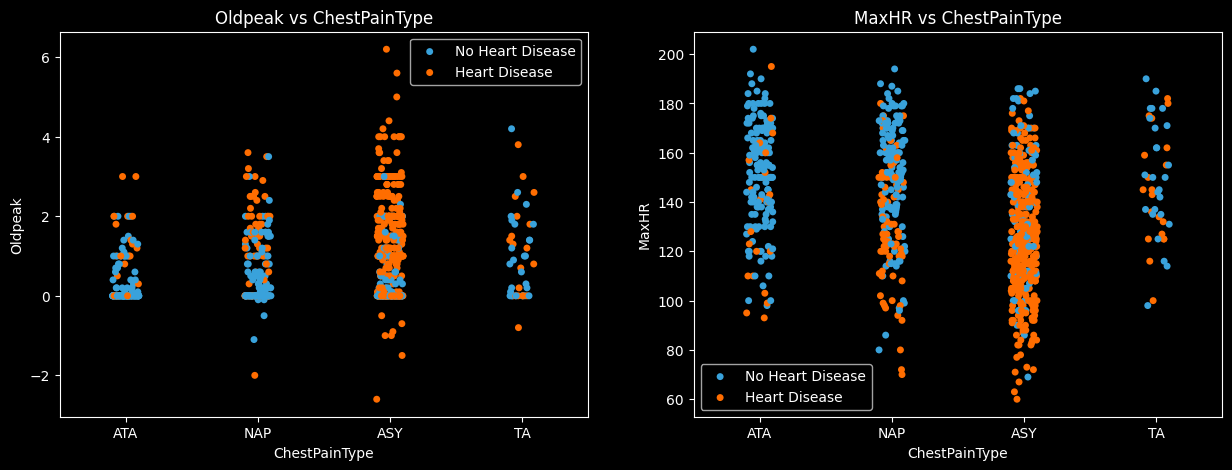

In [185]:
# Create subplots for strip plots comparing numerical features against Chest Pain Type and Heart Disease
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through the first 3 numerical features to create strip plots
for i in range(3):
    plt.subplot(1, 3, i + 1)
    
    # Create a strip plot with 'ChestPainType' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='ChestPainType', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType'
    plt.title(title)

# Create subplots for the last 2 numerical features
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loop through the last 2 numerical features using negative indices
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    
    # Create a strip plot with 'ChestPainType' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='ChestPainType', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ChestPainType' 
    plt.title(title)


#### FastingBS vs Numerical features :

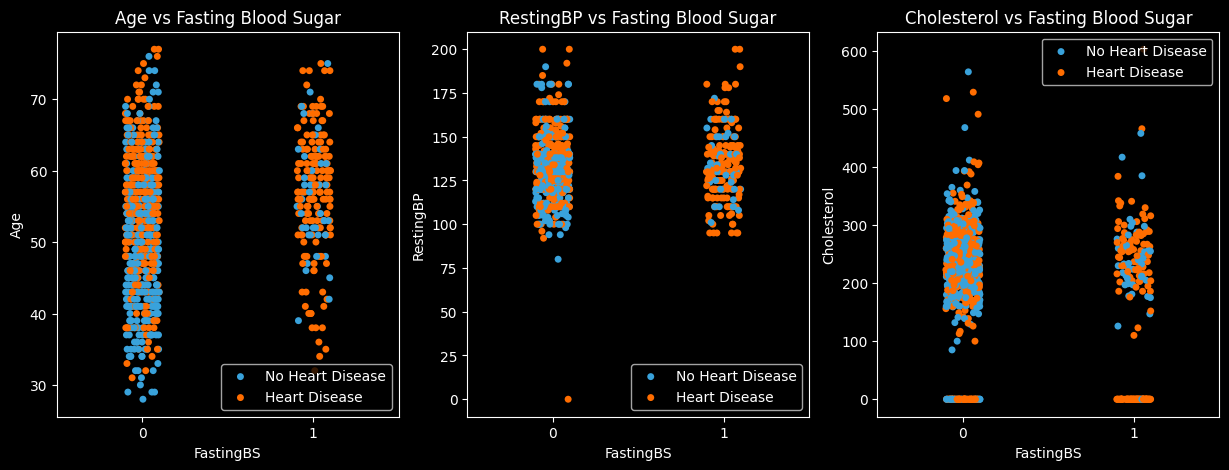

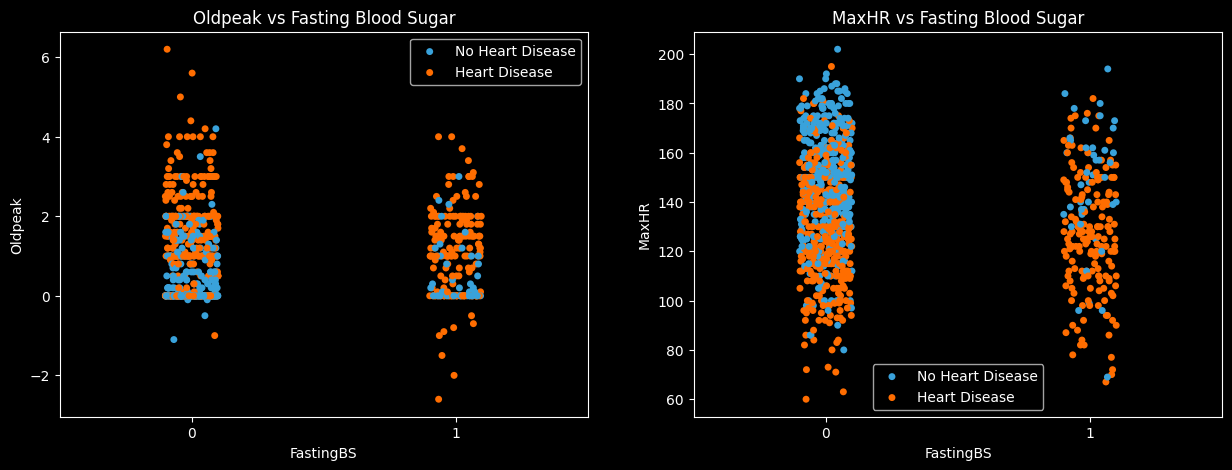

In [186]:
# Create subplots for strip plots comparing numerical features against Fasting Blood Sugar and Heart Disease
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through the first 3 numerical features to create strip plots
for i in range(3):
    plt.subplot(1, 3, i + 1)
    
    # Create a strip plot with 'FastingBS' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='FastingBS', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title)

# Create subplots for the last 2 numerical features
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loop through the last 2 numerical features using negative indices
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    
    # Create a strip plot with 'FastingBS' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='FastingBS', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs Fasting Blood Sugar' 
    plt.title(title)


- Above the **age** 50, heart diseases are found throughout the data irrespective of the patient being diagnosed with Fasting Blood Sugar or not.
- **Fasting Blood Sugar** with **Resting BP** over 100 has displayed more cases of heart diseases than patients with no fasting blood sugar.
- **Cholesterol** with **Fasting Blood Sugar** does not seem to have an effect in understanding reason behind heart diseases.
- Patients that have not been found positive with **Fasting Blood Sugar** but have maximum heart rate below 130 are more prone to heart diseases.

#### RestingECG vs Numerical Features :

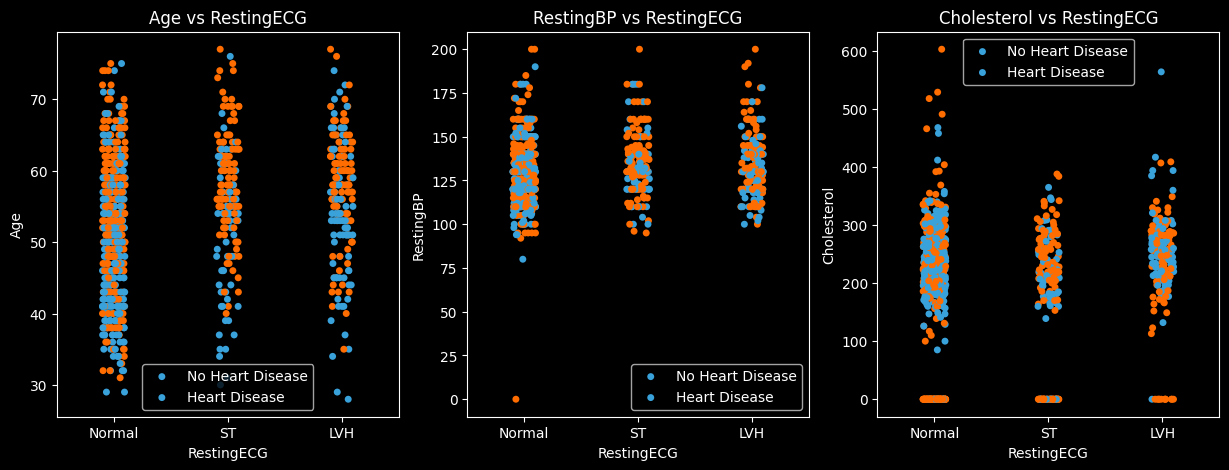

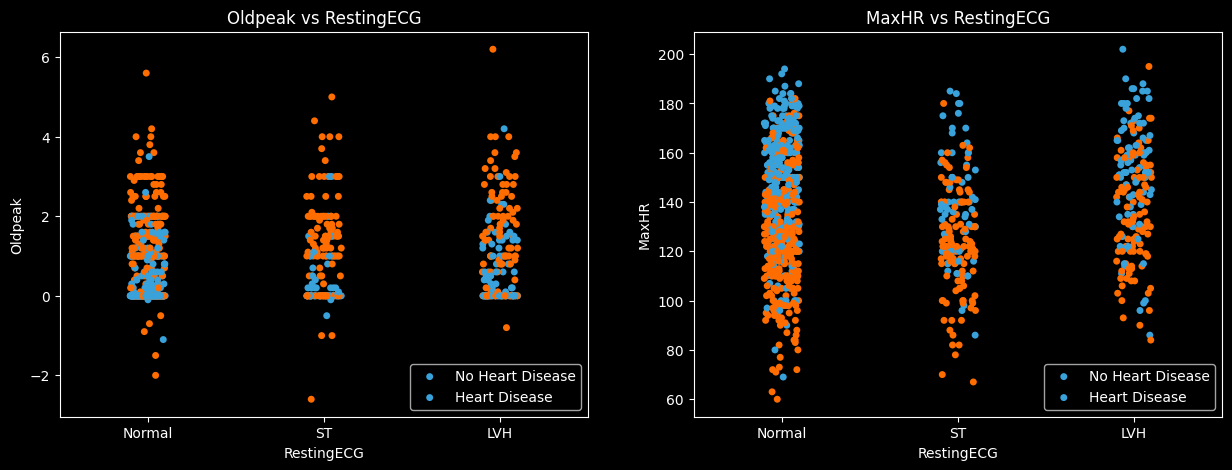

In [187]:
# Create subplots for strip plots comparing numerical features against Resting ECG and Heart Disease
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through the first 3 numerical features to create strip plots
for i in range(3):
    plt.subplot(1, 3, i + 1)
    
    # Create a strip plot with 'RestingECG' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='RestingECG', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title)

# Create subplots for the last 2 numerical features
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loop through the last 2 numerical features using negative indices
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    
    # Create a strip plot with 'RestingECG' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='RestingECG', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs RestingECG' 
    plt.title(title)


#### ExerciseAngina vs Numerical Features :

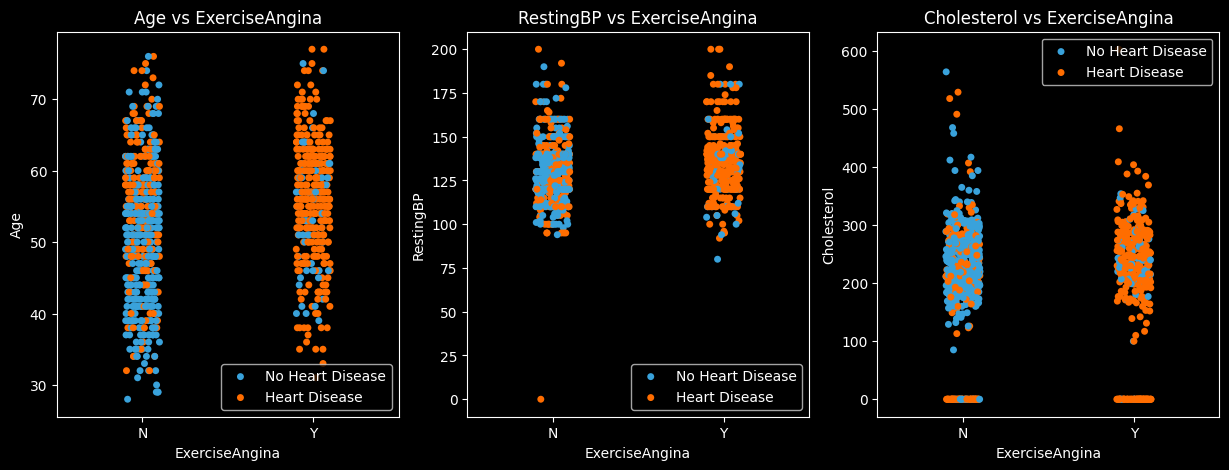

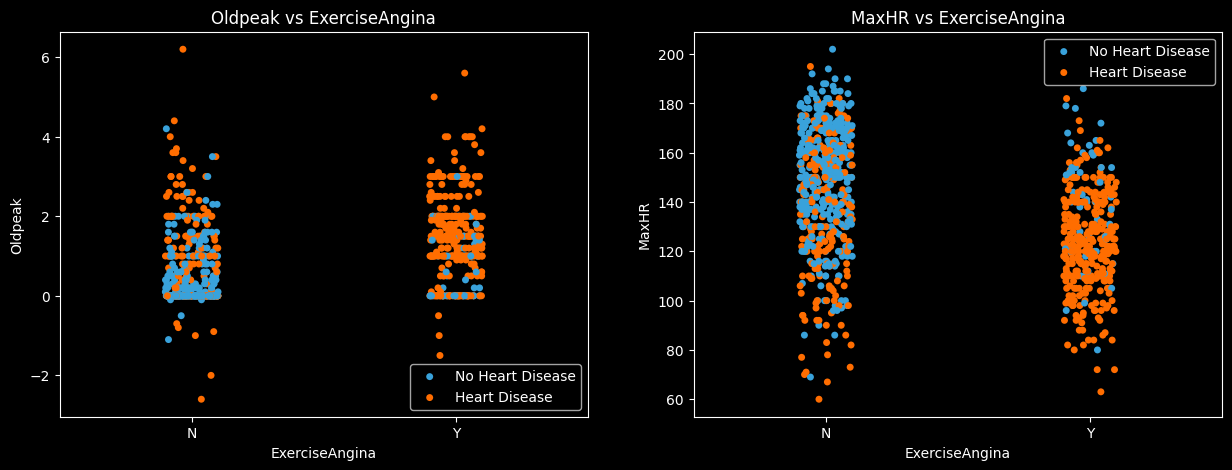

In [189]:
# Create subplots for strip plots comparing numerical features against Exercise Angina and Heart Disease
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through the first 3 numerical features to create strip plots
for i in range(3):
    plt.subplot(1, 3, i + 1)
    
    # Create a strip plot with 'ExerciseAngina' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='ExerciseAngina', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina'
    plt.title(title)

# Create subplots for the last 2 numerical features
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loop through the last 2 numerical features using negative indices
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    
    # Create a strip plot with 'ExerciseAngina' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='ExerciseAngina', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ExerciseAngina' 
    plt.title(title)


- A crsytal clear observation can be made about the relationship between **heart disease** case and **Exercise induced Angina**. A positive correlation between the 2 features can be concluded throughout all the numerical features. 

#### ST_Slope vs Numerical Features :

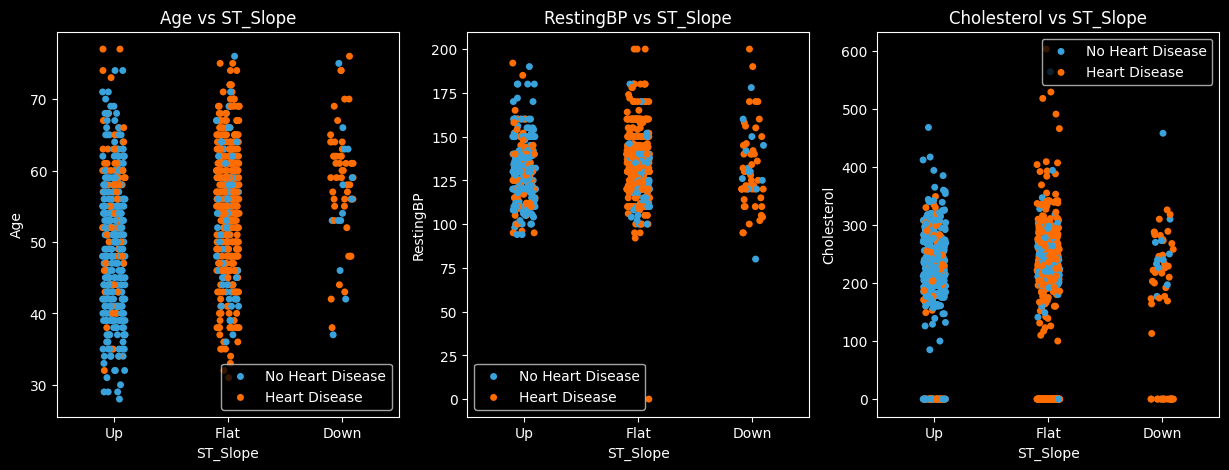

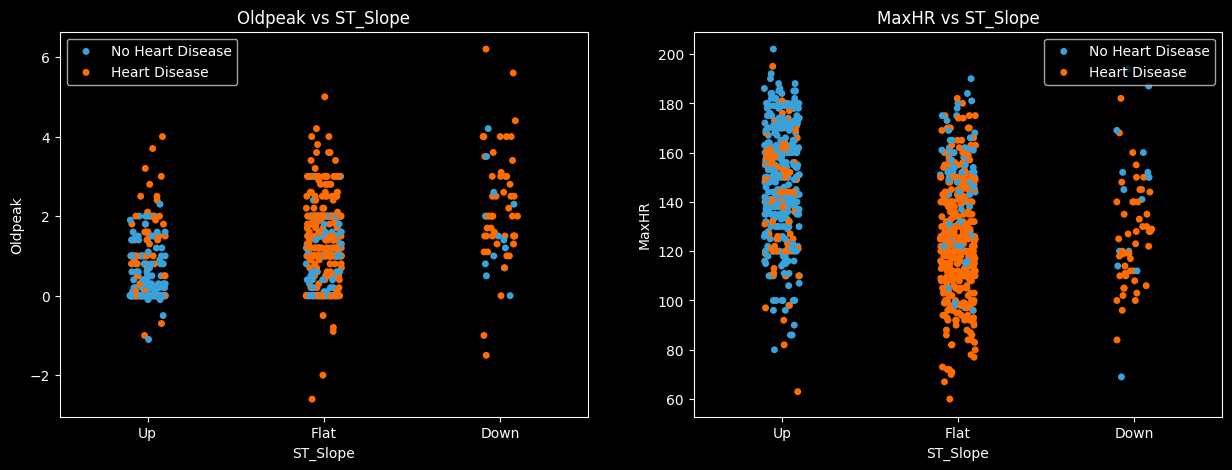

In [190]:
# Create subplots for strip plots comparing numerical features against ST Slope and Heart Disease
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Loop through the first 3 numerical features to create strip plots
for i in range(3):
    plt.subplot(1, 3, i + 1)
    
    # Create a strip plot with 'ST_Slope' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='ST_Slope', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title)

# Create subplots for the last 2 numerical features
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Loop through the last 2 numerical features using negative indices
for i in [-1, -2]:
    plt.subplot(1, 2, -i)
    
    # Create a strip plot with 'ST_Slope' on x-axis and numerical feature on y-axis, differentiated by 'HeartDisease' hue
    sns.stripplot(x='ST_Slope', y=numerical_features[i], data=data, hue='HeartDisease', palette=colors)
    plt.legend(['No Heart Disease', 'Heart Disease'])
    title = numerical_features[i] + ' vs ST_Slope' 
    plt.title(title)


### Numerical features vs Numerical features w.r.t Target variable(HeartDisease) :

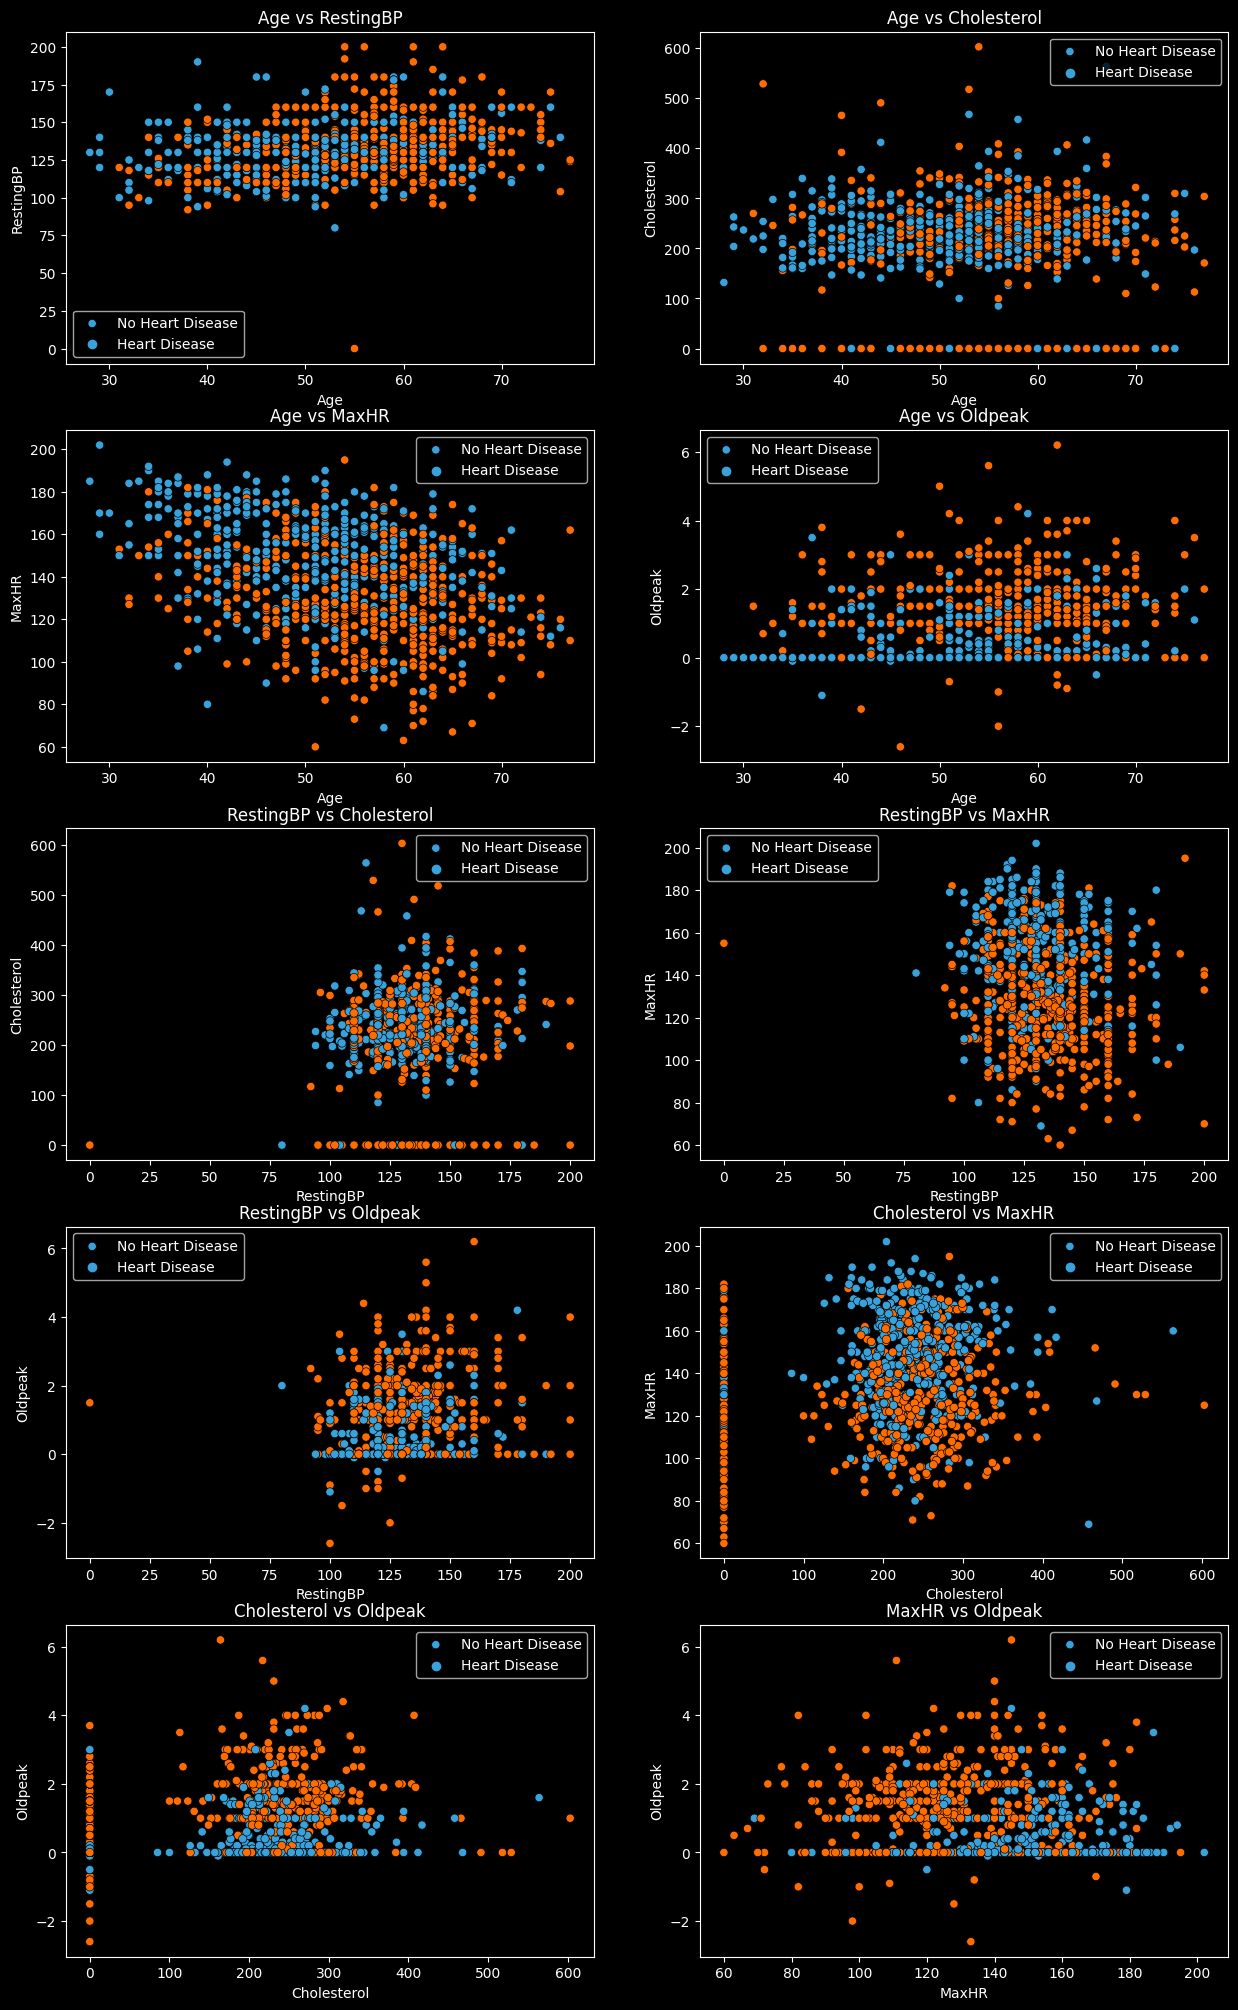

In [191]:
# Initialize a counter variable
a = 0

# Create subplots for scatter plots comparing pairs of numerical features against Heart Disease
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(15, 25))

# Loop through pairs of numerical features for scatter plot comparison
for i in range(len(numerical_features)):
    for j in range(len(numerical_features)):
        # Ensure that i and j are different and that j is greater than i to avoid duplicate plots
        if i != j and j > i:
            a += 1  # Increment the counter
            
            # Create a scatter plot with numerical_features[i] on x-axis and numerical_features[j] on y-axis,
            # differentiated by 'HeartDisease' hue
            plt.subplot(5, 2, a)
            sns.scatterplot(x=numerical_features[i], y=numerical_features[j], data=data, hue='HeartDisease', palette=colors, edgecolor='black')
            plt.legend(['No Heart Disease', 'Heart Disease'])
            title = numerical_features[i] + ' vs ' + numerical_features[j]
            plt.title(title)


<div>Summary of EDA</div>

Ranking of features for positive cases of heart disease :

- **Categorical Features (Order) :**
    - Sex : Male > Female
    - ChestPainType : ASY > NAP > ATA > TA
    - FastingBS : ( FBS < 120 mg/dl ) > ( FBS > 120 mg/dl)
    - RestingECG : Normal > ST > LVH
    - ExerciseAngina : Angina > No Angina
    - ST_Slope : Flat > Up > Down
 
- **Numerical Features (Range) :**
    - Age : 50+
    - RestingBP : 95 - 170 
    - Cholesterol : 160 - 340
    - MaxHR : 70 - 180
    - Oldpeak : 0 - 4
    
    
**Now that we have understood the typical values of the features, we move on to the next step where we select the appropriate features for modeling!**

<div>Feature Engineering</div>

### Data Scaling :

In [192]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Create instances of MinMaxScaler and StandardScaler
mms = MinMaxScaler()  # For normalization
ss = StandardScaler()  # For standardization

# Apply MinMax scaling to the 'Oldpeak' feature
df1['Oldpeak'] = mms.fit_transform(df1[['Oldpeak']])

# Apply Standard scaling to the 'Age', 'RestingBP', 'Cholesterol', and 'MaxHR' features
df1['Age'] = ss.fit_transform(df1[['Age']])
df1['RestingBP'] = ss.fit_transform(df1[['RestingBP']])
df1['Cholesterol'] = ss.fit_transform(df1[['Cholesterol']])
df1['MaxHR'] = ss.fit_transform(df1[['MaxHR']])

# Display the modified DataFrame
df1.head()


Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG   
0 -1.43    1              1       0.41         0.83          0           1  \
1 -0.48    0              2       1.49        -0.17          0           1   
2 -1.75    1              1      -0.13         0.77          0           2   
3 -0.58    0              0       0.30         0.14          0           1   
4  0.05    1              2       0.95        -0.03          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0   1.38               0     0.30         2             0  
1   0.75               0     0.41         1             1  
2  -1.53               0     0.30         2             0  
3  -1.13               1     0.47         1             1  
4  -0.58               0     0.30         2             0

- Machine learning model does not understand the units of the values of the features. It treats the input just as a simple number but does not understand the true meaning of that value. Thus, it becomes necessary to scale the data.

**Eg :** Age = Years; FastingBS = mg / dl 

- We have 2 options for data scaling : 1) **Normalization** 2) **Standardization**. As most of the algorithms assume the data to be normally (Gaussian) distributed, **Normalization** is done for features whose data does not display normal distribution and **standardization** is carried out for features that are normally distributed where their values are huge or very small as compared to other features.


- **Normalization** : **Oldpeak** feature is normalized as it had displayed a right skewed data distribution.
- **Standardizarion** : **Age**, **RestingBP**, **Cholesterol** and **MaxHR** features are scaled down because these features are normally distributed.

### Correlation Matrix :

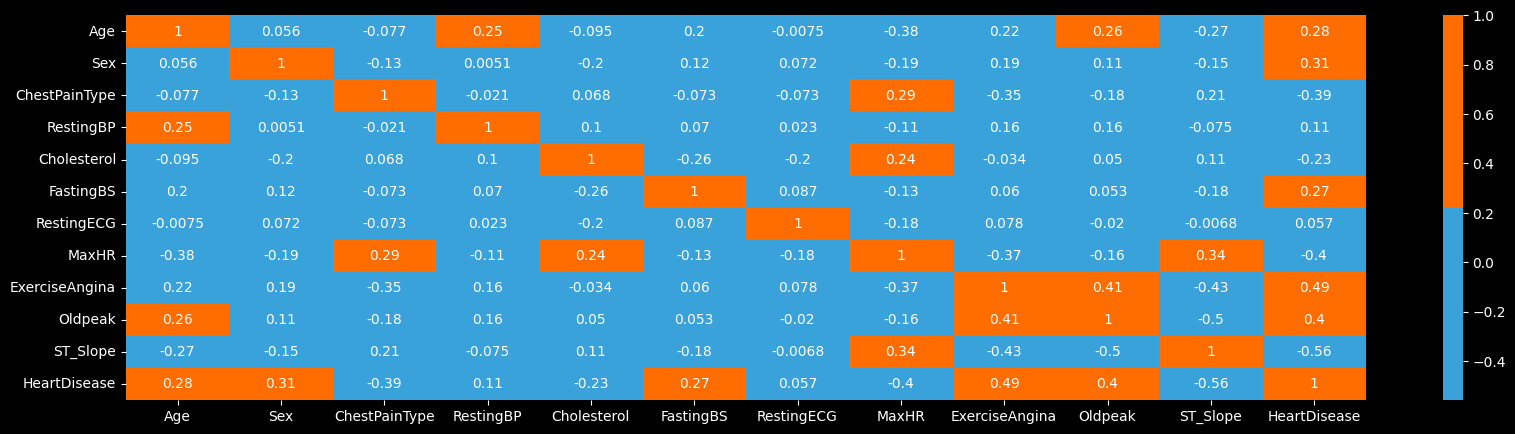

In [193]:
plt.figure(figsize=(20, 5))  # Set the size of the figure

# Create a heatmap of the correlation matrix of df1
sns.heatmap(df1.corr(), cmap=colors, annot=True)

# The 'cmap' parameter specifies the color map to use for the heatmap
# The 'annot' parameter adds numeric values to the cells of the heatmap

plt.show()  # Display the heatmap


- It is a huge matrix with too many features. We will check the correlation only with respect to **HeartDisease**. 

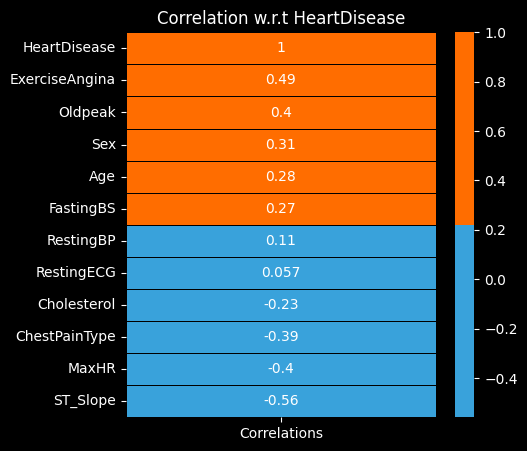

In [194]:
# Calculate the correlation of each feature with 'HeartDisease' and sort in descending order
corr = df1.corrwith(df1['HeartDisease']).sort_values(ascending=False).to_frame()

# Rename the column to 'Correlations'
corr.columns = ['Correlations']

# Create a subplot with specified figure size
plt.subplots(figsize=(5, 5))

# Create a heatmap of the correlation values
sns.heatmap(corr, annot=True, cmap=colors, linewidths=0.4, linecolor='black')

# Add a title to the heatmap
plt.title('Correlation w.r.t HeartDisease')

# Display the heatmap
plt.show()


- Except for **RestingBP** and **RestingECG**, everyone displays a positive or negative relationship with **HeartDisease**.

### Feature Selection for Categorical Features :

#### Chi Squared Test :

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

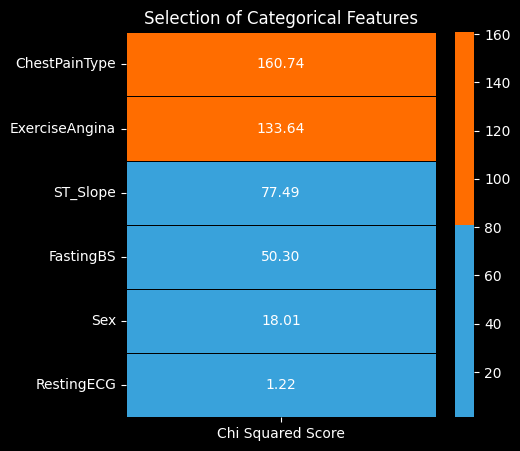

In [195]:
features = df1.loc[:, categorical_features[:-1]]  # Selecting all categorical features except the last one
target = df1.loc[:, categorical_features[-1]]  # Selecting the last categorical feature as the target

# Initialize SelectKBest with chi2 scoring function and 'all' features
best_features = SelectKBest(score_func=chi2, k='all')

# Fit SelectKBest to the features and target
fit = best_features.fit(features, target)

# Create a DataFrame to store the chi-squared scores for each feature
featureScores = pd.DataFrame(data=fit.scores_, index=list(features.columns), columns=['Chi Squared Score'])

# Create a subplot with specified figure size
plt.subplots(figsize=(5, 5))

# Create a heatmap to visualize the chi-squared scores
sns.heatmap(featureScores.sort_values(ascending=False, by='Chi Squared Score'), annot=True, cmap=colors, linewidths=0.4, linecolor='black', fmt='.2f')

# Add a title to the heatmap
plt.title('Selection of Categorical Features')

# Display the heatmap
plt.show()

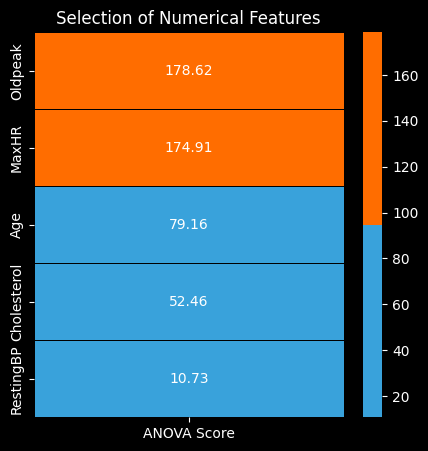

In [ ]:
#I conduct feature selection
from sklearn.feature_selection import f_classif

features = df1.loc[:,numerical_features]
target = df1.loc[:,categorical_features[-1]]

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

<center><h1>Modeling</h1></center>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [ ]:
# Selecting all columns except 'HeartDisease', 'RestingBP', and 'RestingECG' as features
features = df1[df1.columns.drop(['HeartDisease', 'RestingBP', 'RestingECG'])].values

# Selecting the 'HeartDisease' column as the target
target = df1['HeartDisease'].values

# Splitting the dataset into training and testing sets
# The test_size parameter determines the proportion of the dataset to be used for testing
# The random_state parameter provides a seed for the random number generator for reproducibility
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=2)


- Selecting the features from the above conducted tests and splitting the data into **80 - 20 train - test** groups.

In [196]:
def model(classifier):
    """
    Trains a classifier, evaluates its performance using various metrics, and plots the ROC curve.

    Args:
        classifier: The classifier instance to be trained and evaluated.

    Returns:
        None
    """
    # Train the classifier and make predictions
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)

    # Perform Cross-Validation
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print('Accuracy: {0:.2%}'.format(accuracy_score(y_test, predictions)))
    print('Cross Validation Score: {0:.2%}'.format(
        cross_val_score(classifier, x_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print('ROC AUC Score: {0:.2%}'.format(roc_auc_score(y_test, predictions)))

    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictions)

    # Plot ROC curve
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


def model_evaluation(classifier):
    """
    Evaluates the classifier's performance using a confusion matrix heatmap and classification report.

    Args:
        classifier: The classifier instance to be evaluated.

    Returns:
        None
    """
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, classifier.predict(x_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    
    # Plot confusion matrix heatmap
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')

    # Display classification report
    print(classification_report(y_test, classifier.predict(x_test)))


#### 1] Logistic Regression :

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier_lr = LogisticRegression(random_state = 0,C=10,penalty= 'l2') 

Accuracy: 87.50%
Cross Validation Score: 91.12%
ROC AUC Score: 87.43%


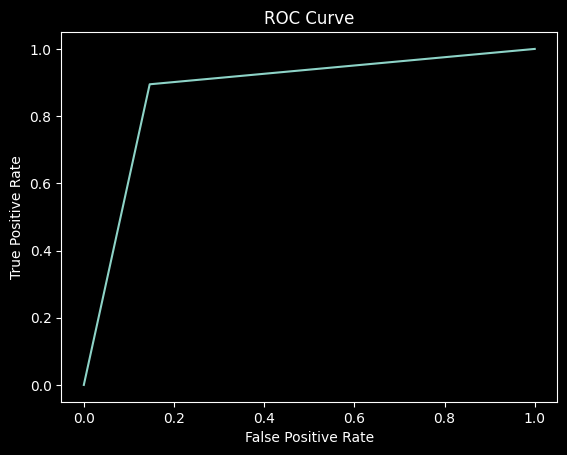

In [ ]:
model(classifier_lr)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



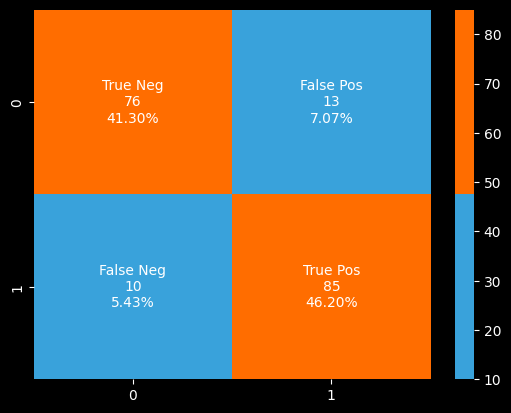

In [ ]:
model_evaluation(classifier_lr)

#### 2] Support Vector Classifier :

In [ ]:
from sklearn.svm import SVC

In [ ]:
classifier_svc = SVC(kernel = 'linear',C = 0.1)

Accuracy: 87.50%


Cross Validation Score: 90.53%
ROC AUC Score: 87.43%


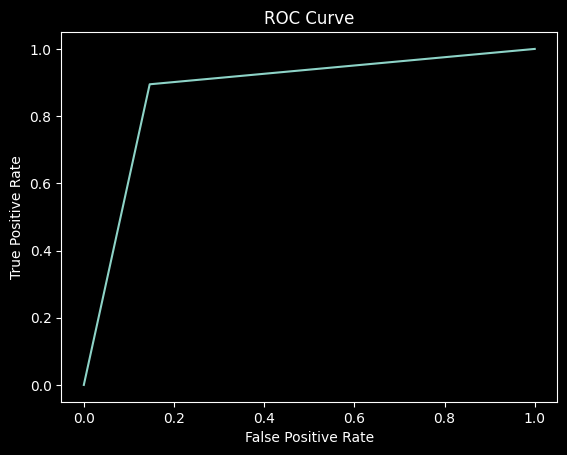

In [ ]:
model(classifier_svc)

              precision    recall  f1-score   support

           0       0.88      0.85      0.87        89
           1       0.87      0.89      0.88        95

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



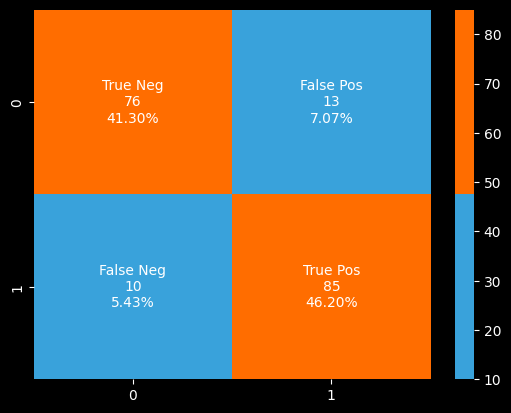

In [ ]:
model_evaluation(classifier_svc)

#### 3] Decision Tree Classifier :

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
classifier_dt = DecisionTreeClassifier(random_state = 1000,max_depth = 4,min_samples_leaf = 1)

Accuracy: 84.78%
Cross Validation Score: 89.09%
ROC AUC Score: 84.62%


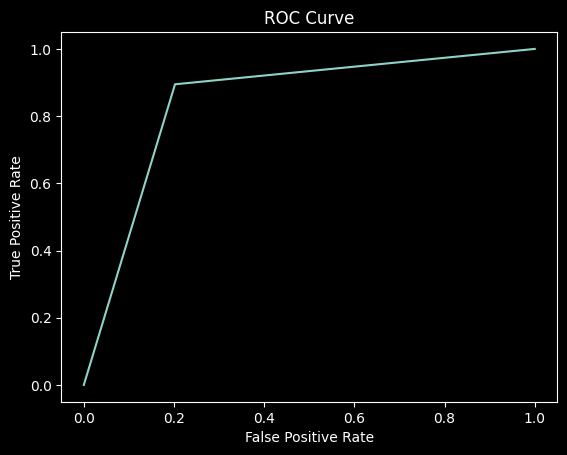

In [ ]:
model(classifier_dt)

              precision    recall  f1-score   support

           0       0.88      0.80      0.84        89
           1       0.83      0.89      0.86        95

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



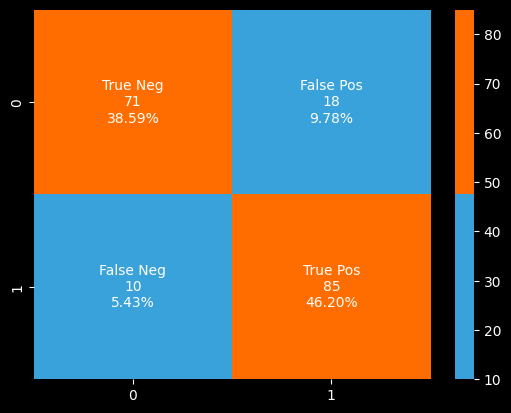

In [ ]:
model_evaluation(classifier_dt)

#### 4] Random Forest Classifier :

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy: 84.24%
Cross Validation Score: 92.91%
ROC AUC Score: 84.06%


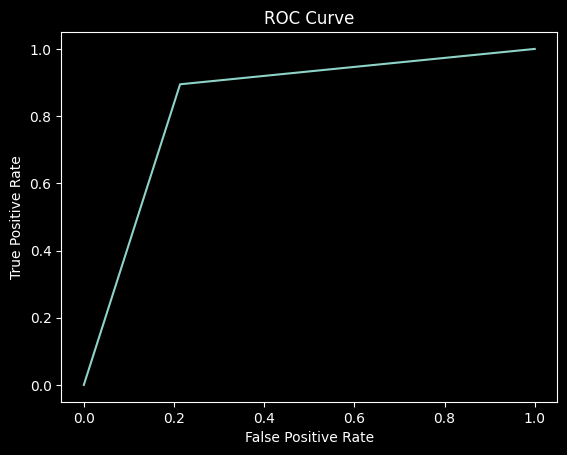

In [ ]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        89
           1       0.82      0.89      0.85        95

    accuracy                           0.84       184
   macro avg       0.85      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



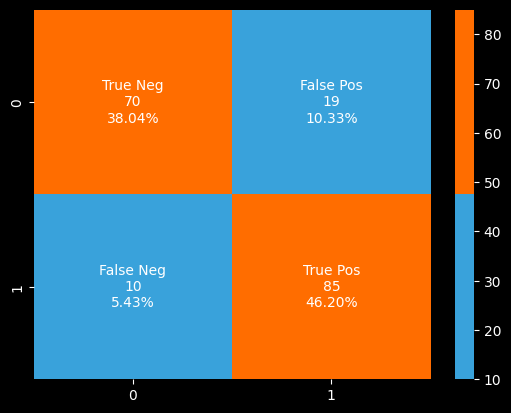

In [ ]:
model_evaluation(classifier_rf)

#### 5] K-nearest Neighbors Classifier :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
classifier_knn = KNeighborsClassifier(leaf_size = 1, n_neighbors = 3,p = 1)

Accuracy: 81.52%
Cross Validation Score: 89.34%
ROC AUC Score: 81.36%


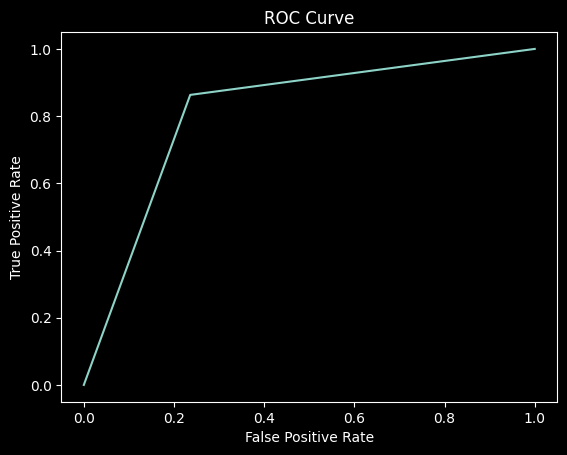

In [ ]:
model(classifier_knn)

              precision    recall  f1-score   support

           0       0.84      0.76      0.80        89
           1       0.80      0.86      0.83        95

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.81       184



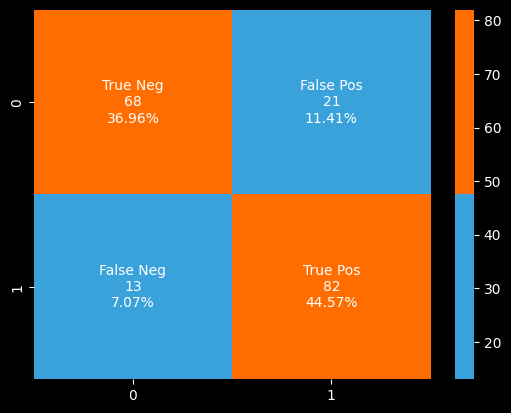

In [ ]:
model_evaluation(classifier_knn)

 <center><h1>Conclusion</h1></center>

- This dataset is great for understanding how to handle binary classification problems with the combination of numerical and categorical features.


- Subject matter experts, in this case doctors or nurses, can be assisted by providing insights that enables them to take the next line of action.


- For feature engineering, it might feel confusing about the order of the processes. In this case, data scaling was executed before the feature selection test. We might feel like we are tampering the data before passing it to the tests but the results are same irrespective of the order of the process. (Try it out!)


- For this problem, outlier detection was not done as I was not able to read any papers about heart diseases. It becomes a pivotal part to understand the subject before removing outliers even though the outlier detection tests come out positive.


- Visualization is key. It makes the data talkative. Displaying the present information and results of any tests or output through visualization becomes crucial as it makes the understanding easy.


- For modeling, hyperparameter tuning is not done. It can push the performances of the algorithms. Overall the algorithm performances are good.